In [24]:
import statistics
directory_path = "../../projectorion/orion/knowledge_graph/stardog/bootstrap_data/rdf-data/environmental_knowledge_graph"
data = {}

In [35]:
# add co2 data to knowledge graph

import csv
import uuid
rdf = ""

# countries = set()
years = set()
year_data = {}
data["co2"] = []

with open("annual-co2-emissions-per-country.csv") as co2:
    reader = csv.reader(co2)
    next(reader)
    for line in reader:
        # country = line[0].replace(" ", "_").replace("'", "_").replace("(","").replace(")","").replace("&","")
        year = line[2]+".0"
        value = float(line[3])
        if year not in year_data:
            year_data[year] = []
        year_data[year].append(value)
        
        # if country not in countries:
        #     rdf += f"env:{country} rdf:type env:Country . \n"

for year in year_data:
    meas_uuid = uuid.uuid4()
    mean_val = statistics.mean(year_data[year])
    data["co2"].append(mean_val)
    if year not in years:
        rdf += f"env:{year} rdf:type env:Year . \n"
    rdf += f"env:{meas_uuid} rdf:type env:Co2Measurement . \n"
    rdf += f"env:{meas_uuid} env:measuresPhenomenon env:Co2Emissions . \n"
    rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
    # rdf += f"env:{meas_uuid} env:measurementAboutCountry env:{country} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasValue {mean_val} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasUnit env:Tonne . \n"

    # countries.add(country)
    years.add(year)
        
with open(f"{directory_path}/co2_emissions.ttl", "w") as write:
    write.write(rdf)

In [26]:
# add deforestation data to knowledge graph

import csv
import uuid
rdf = ""

# countries = set()
years = set()
year_data = {}
data["deforestation"] = []

with open("forest-area-km.csv") as forest:
    reader = csv.reader(forest)
    next(reader)
    for line in reader:
        # country = line[0].replace(" ", "_").replace("'", "_").replace(",","").replace("(","").replace(")","")
        year = line[2]+".0"
        value = float(line[3])
        if year not in year_data:
            year_data[year] = []
        year_data[year].append(value)
        
for year in year_data:
    meas_uuid = uuid.uuid4()
    mean_val = statistics.mean(year_data[year])
    data["deforestation"].append(mean_val)

    # if country not in countries:
    #     rdf += f"env:{country} rdf:type env:Country . \n"
    if year not in years:
        rdf += f"env:{year} rdf:type env:Year . \n"
    rdf += f"env:{meas_uuid} rdf:type env:ForestAreaMeasurement . \n"
    rdf += f"env:{meas_uuid} env:measuresPhenomenon env:Deforestation . \n"
    rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
    # rdf += f"env:{meas_uuid} env:measurementAboutCountry env:{country} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasValue {mean_val} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasUnit env:Hectare . \n"

# countries.add(country)
years.add(year)
        
with open(f"{directory_path}/deforestation.ttl", "w") as write:
    write.write(rdf)

In [27]:
# add sea level data to knowledge graph

import csv
import uuid
rdf = ""

years = set()
data["sea_level"] = []

with open("global_sea_level.tsv") as forest:
    reader = csv.reader(forest, delimiter="\t")
    next(reader)
    for line in reader:
        year = line[0].split(".")[0]+"."+line[0].split(".")[1][:1]
        value = float(line[1])
        data["sea_level"].append(value)
        
        meas_uuid = uuid.uuid4()
        
        if year not in years:
            rdf += f"env:{year} rdf:type env:Year . \n"
        rdf += f"env:{meas_uuid} rdf:type env:SeaLevelMeasurement . \n"
        rdf += f"env:{meas_uuid} env:measuresPhenomenon env:SeaLevelRise . \n"
        rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
        rdf += f"env:{meas_uuid} env:measurementHasValue {value} . \n"
        rdf += f"env:{meas_uuid} env:measurementHasUnit env:Millimeter . \n"
            
        years.add(year)
        
with open(f"{directory_path}/sea_level.ttl", "w") as write:
    write.write(rdf)

In [28]:
# add global temp data to knowledge graph

import csv
import uuid
rdf = ""

years = set()
year_data = {}
data["global_temp"] = []

with open("global_temp_monthly_avg.tsv") as temp:
    reader = csv.reader(temp, delimiter=" ")
    next(reader)
    next(reader)
    next(reader)
    for line in reader:
        line = [x for x in line if x != ""]
        year = line[0]+str((int(line[1])/12)-1)[2:4]
        value = float(line[2])
        if str(value) not in ["nan", "NaN"]:
            if year not in year_data:
                year_data[year] = []
            year_data[year].append(value)
        
for year in year_data:
    meas_uuid = uuid.uuid4()
    mean_val = statistics.mean(year_data[year])
    data["global_temp"].append(mean_val)
    if year not in years:
        rdf += f"env:{year} rdf:type env:Year . \n"
    rdf += f"env:{meas_uuid} rdf:type env:GlobalTemperatureMeasurement . \n"
    rdf += f"env:{meas_uuid} env:measuresPhenomenon env:GlobalWarming . \n"
    rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasValue {mean_val} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasUnit env:Celsius . \n"

years.add(year)
        
with open(f"{directory_path}/global_warming.ttl", "w") as write:
    write.write(rdf)

In [29]:
# add biodiversity data to knowledge graph

import csv
import uuid
rdf = ""

years = set()
# countries = set()
data["biodiversity"] = []

with open("global-living-planet-index.csv") as biodiversity:
    reader = csv.reader(biodiversity)
    next(reader)
    for line in reader:
        if line[0] == "World":
        # country = line[0].replace(" ", "_").replace("'", "_")
            year = line[2]+".0"
            value = float(line[3])
            data["biodiversity"].append(value)

            meas_uuid = uuid.uuid4()

            if year not in years:
                rdf += f"env:{year} rdf:type env:Year . \n"
            # if country not in countries:
            #     rdf += f"env:{country} rdf:type env:Country . \n"
            rdf += f"env:{meas_uuid} rdf:type env:BiodiversityMeasurement . \n"
            rdf += f"env:{meas_uuid} env:measuresPhenomenon env:BiodiversityLoss . \n"
            rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
            # rdf += f"env:{meas_uuid} env:measurementAboutCountry env:{country} . \n"
            rdf += f"env:{meas_uuid} env:measurementHasValue {value} . \n"
            rdf += f"env:{meas_uuid} env:measurementHasUnit env:LivingPlanetIndex . \n"

            years.add(year)
            # countries.add(country)
        
with open(f"{directory_path}/biodiversity.ttl", "w") as write:
    write.write(rdf)

In [30]:
# add air pollution data to knowledge graph

import csv
import uuid
rdf = ""

years = set()
# countries = set()
year_data = {}
data["air_pollution"] = []

with open("PM25-air-pollution.csv") as airpollution:
    reader = csv.reader(airpollution)
    next(reader)
    for line in reader:
        # country = line[0].replace(" ", "_").replace("'", "_").replace("_(country)","")
        year = line[2]+".0"
        value = float(line[3])
        if year not in year_data:
            year_data[year] = []
        year_data[year].append(value)
        
for year in year_data:
    meas_uuid = uuid.uuid4()
    mean_val = statistics.mean(year_data[year])
    data["air_pollution"].append(mean_val)
    if year not in years:
        rdf += f"env:{year} rdf:type env:Year . \n"
    # if country not in countries:
    #     rdf += f"env:{country} rdf:type env:Country . \n"
    rdf += f"env:{meas_uuid} rdf:type env:AirPollutionMeasurement . \n"
    rdf += f"env:{meas_uuid} env:measuresPhenomenon env:AirPollution . \n"
    rdf += f"env:{meas_uuid} env:measurementFromYear env:{year} . \n"
    # rdf += f"env:{meas_uuid} env:measurementAboutCountry env:{country} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasValue {mean_val} . \n"
    rdf += f"env:{meas_uuid} env:measurementHasUnit env:Micrograms . \n"

    years.add(year)
    # countries.add(country)

with open(f"{directory_path}/air_pollution.ttl", "w") as write:
    write.write(rdf)

In [32]:
import statistics
for key, key_data in data.items():
    print(key)
    print(key_data)
    print("mean", statistics.mean(key_data))
    print("sd", statistics.stdev(key_data))
    print("var", statistics.variance(key_data))
    print("max", max(key_data))
    print("min", min(key_data))

co2
[211033798.57723576, 153538197.36507937, 162801983.7, 164656998.4450262, 168513097.55208334, 171679789.51546392, 184063720.36363637, 196110942.2020202, 201856032.67336684, 202221761.49509802, 204697877.1042654, 217337878.23222747, 218414398.28773585, 224916646.34579438, 236330691.66511628, 245721437.66513762, 256353577.63302752, 268243429.32568806, 276646958.9678899, 290373641.283105, 309381680.60730594, 329052567.4504505, 340934377.0762332, 354648179.95089287, 374930851.4663677, 374374825.206278, 375855051.40358746, 397070761.3811659, 407194494.93721974, 419743029.83856505, 431820279.80717486, 431903009.9864865, 419230756.2600897, 416400684.7802691, 418901110.0807175, 433729392.5495495, 448966880.6756757, 454548801.2207207, 463557308.9596413, 479950701.36771303, 485713467.470852, 477142519.76623374, 475589397.4377682, 461442032.9529914, 463418935.3418803, 461508238.4723404, 469453513.40425533, 482071297.34042555, 482930252.9404255, 480127104.52340424, 485410132.3914894, 499026210.

coefficient: [-0.2]
intercept: 10000.2


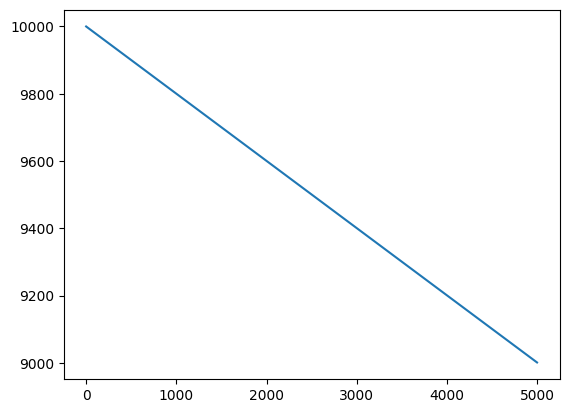

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

res = pd.read_csv("../env_query_res.csv")
airpol = res.ForestAreaMeasurement
co2 = res.GlobalTemperatureMeasurement

model = LinearRegression()
model.fit(np.array(co2).reshape((-1, 1)), np.array(airpol))
print("coefficient:", model.coef_)
print("intercept:", model.intercept_)

plt.plot(co2, airpol)
plt.show()

(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 2., 1.,
        0., 0., 1.]),
 array([27.42421629, 27.49517559, 27.56613489, 27.63709419, 27.70805349,
        27.77901278, 27.84997208, 27.92093138, 27.99189068, 28.06284998,
        28.13380928, 28.20476857, 28.27572787, 28.34668717, 28.41764647,
        28.48860577, 28.55956507, 28.63052436, 28.70148366, 28.77244296,
        28.84340226, 28.91436156, 28.98532086, 29.05628015, 29.12723945,
        29.19819875, 29.26915805, 29.34011735, 29.41107665, 29.48203594,
        29.55299524, 29.62395454, 29.69491384, 29.76587314, 29.83683244,
        29.90779173, 29.97875103, 30.04971033]),
 <BarContainer object of 37 artists>)

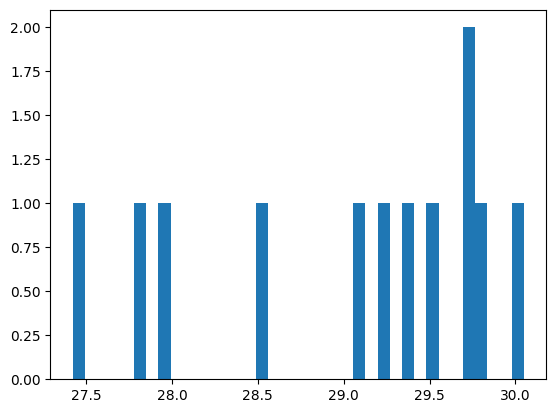

In [40]:
from matplotlib import pyplot as plt
plt.hist(data["air_pollution"], bins=37)